In [ ]:
!python -m pip install -r requirements.txt

In [1]:
from math import cos, sin
import numpy as np

A, B = 50, 70
def condition(u_k: np.array, k: int) -> type(None):
    t = 0.0625 * k
    i, j = 100 + int(A * sin(t)), 100 + int(B * cos(t))
    u_k[i - 1:i+1, j - 1:j + 1] = 100.0

def calculate(u: np.ndarray, gamma: float) -> np.ndarray:
    for k in range(u.shape[0] - 1):
        A = u[k, 2:  , 1:-1]
        B = u[k,  :-2, 1:-1]
        C = u[k, 1:-1, 2:  ]
        D = u[k, 1:-1,  :-2]
        E = u[k, 1:-1, 1:-1]
        u[k + 1, 1:-1, 1:-1] = gamma * (A + B + C + D - 4.0 * E) + E
        condition(u[k+1], k + 1)
    return u

In [2]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def plot_heatmap(u_k: np.ndarray, k: int, vmin: float, vmax: float):
    plt.clf()

    plt.title(F"Temperature at t = {k} unit time")
    plt.xlabel("x")
    plt.ylabel("y")

    plt.pcolormesh(u_k, cmap=plt.cm.jet, vmin=vmin, vmax=vmax)
    plt.colorbar()

    return plt

def animate(u: np.ndarray, k: int, vmin: float, vmax: float):
    plotheatmap(u[k], k, vmin, vmax)

In [3]:
GAMMA = 0.25
u = np.zeros((3, 1024, 1024))
condition(u, 0)
u = calculate(u, GAMMA)
vmin, vmax = u.min(), u.max()
animate = lambda k: plot_heatmap(u[k], k, vmin, vmax)
animation = FuncAnimation(plt.figure(), animate, interval=1, frames=len(u), repeat=False)
animation.save("heat_equation_solution.gif")

<module 'matplotlib.pyplot' from 'C:\\Program Files (x86)\\Microsoft Visual Studio\\Shared\\Anaconda3_64\\lib\\site-packages\\matplotlib\\pyplot.py'>

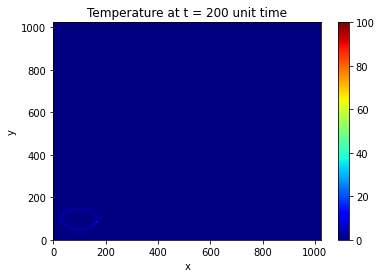

In [8]:
animate(200)

In [ ]:
from timeit import default_timer as timer

from pydmd import DMD

now = timer()
dmd = DMD(svd_rank=-1, exact=False).fit(x_upper)
print(timer() - now)